In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key
from datetime import datetime
import time

In [2]:
# Starting URL for Weather Map API Call + API Key variable
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)

In [3]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-90, 90, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
#Create a list for storing the data we pull
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval")
print("-----------------------------")

#Create the counters
record_count = 1
set_count = 1

Beginning Data Retrieval
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | yashkul
Processing Record 5 of Set 1 | karakendzha
City not found. Skipping...
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | ortigueira
Processing Record 8 of Set 1 | nueve de julio
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | camacha
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | bonavista
Processing Record 14 of Set 1 | dharchula
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | ilhabela
Processing Record 17 of Set 1 | ituiutaba
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | koslan
Processing Record 20 of Set 1 | marcona
City not found. Skipping...
Processing Record 21 of Set 1 | iberia
Processing Record 22 of Set 1 | ambilobe
Proce

Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | plettenberg bay
Processing Record 42 of Set 4 | machiques
Processing Record 43 of Set 4 | ayagoz
Processing Record 44 of Set 4 | chiredzi
Processing Record 45 of Set 4 | yar-sale
Processing Record 46 of Set 4 | oum hadjer
Processing Record 47 of Set 4 | astana
Processing Record 48 of Set 4 | sussex
Processing Record 49 of Set 4 | bage
Processing Record 50 of Set 4 | soubre
Processing Record 1 of Set 5 | littleton
Processing Record 2 of Set 5 | gardone val trompia
Processing Record 3 of Set 5 | kutum
Processing Record 4 of Set 5 | palencia
Processing Record 5 of Set 5 | mkushi
Processing Record 6 of Set 5 | natal
Processing Record 7 of Set 5 | umm lajj
Processing Record 8 of Set 5 | chapais
Processing Record 9 of Set 5 | kang
Processing Record 10 of Set 5 | mizan teferi
Processing Record 11 of Set 5 | arenapolis
Processing Record 12 of Set 5 | kuche
City not found. Skipping..

Processing Record 29 of Set 8 | ambovombe
Processing Record 30 of Set 8 | tsabong
Processing Record 31 of Set 8 | dutlwe
Processing Record 32 of Set 8 | durban
Processing Record 33 of Set 8 | thunder bay
Processing Record 34 of Set 8 | sioux lookout
Processing Record 35 of Set 8 | fougamou
Processing Record 36 of Set 8 | sandwick
Processing Record 37 of Set 8 | angoche
Processing Record 38 of Set 8 | bonthe
Processing Record 39 of Set 8 | zabid
Processing Record 40 of Set 8 | sidi ali
Processing Record 41 of Set 8 | ghanzi
Processing Record 42 of Set 8 | dubti
Processing Record 43 of Set 8 | anloga
Processing Record 44 of Set 8 | oktyabrskoye
Processing Record 45 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 46 of Set 8 | urubicha
Processing Record 47 of Set 8 | asyut
Processing Record 48 of Set 8 | san miguel
Processing Record 49 of Set 8 | kapuskasing
Processing Record 50 of Set 8 | rundu
Processing Record 1 of Set 9 | thouars
Processing Record 2 of Set 9 | pri

Processing Record 20 of Set 12 | ritchie
Processing Record 21 of Set 12 | port shepstone
Processing Record 22 of Set 12 | tarudant
City not found. Skipping...
Processing Record 23 of Set 12 | burica
City not found. Skipping...
Processing Record 24 of Set 12 | doka
Processing Record 25 of Set 12 | ajdabiya
Processing Record 26 of Set 12 | mmathubudukwane
Processing Record 27 of Set 12 | albany
Processing Record 28 of Set 12 | buenos aires
Processing Record 29 of Set 12 | kattivakkam
Processing Record 30 of Set 12 | shache
Processing Record 31 of Set 12 | aflu
City not found. Skipping...
Processing Record 32 of Set 12 | provins
Processing Record 33 of Set 12 | najran
Processing Record 34 of Set 12 | kayerkan
Processing Record 35 of Set 12 | shu
Processing Record 36 of Set 12 | morristown
Processing Record 37 of Set 12 | dubna
Processing Record 38 of Set 12 | saryozek
Processing Record 39 of Set 12 | pultusk
Processing Record 40 of Set 12 | inderborskiy
City not found. Skipping...
Process

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.05,-27.98,73.29,90,0,15.14,PT,2020-08-23 21:14:49
1,Saint George,37.10,-113.58,105.01,18,1,4.70,US,2020-08-23 21:13:23
2,Port Elizabeth,-33.92,25.57,57.20,87,97,5.82,ZA,2020-08-23 21:11:47
3,Yashkul,46.17,45.34,70.48,37,99,7.20,RU,2020-08-23 21:14:50
4,Salalah,17.02,54.09,77.00,94,90,5.82,OM,2020-08-23 21:14:51
5,Ortigueira,-24.21,-50.95,56.17,77,0,4.92,BR,2020-08-23 21:14:51
6,Nueve De Julio,-35.44,-60.88,68.00,30,0,11.01,AR,2020-08-23 21:14:51
7,Ilulissat,69.22,-51.10,44.60,65,0,4.70,GL,2020-08-23 21:13:42
8,Camacha,33.08,-16.33,73.40,78,40,16.11,PT,2020-08-23 21:14:52
9,Pisco,-13.70,-76.22,63.00,77,90,6.93,PE,2020-08-23 21:10:20


In [10]:
column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df =city_data_df[column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2020-08-23 21:14:49,39.05,-27.98,73.29,90,0,15.14
1,Saint George,US,2020-08-23 21:13:23,37.10,-113.58,105.01,18,1,4.70
2,Port Elizabeth,ZA,2020-08-23 21:11:47,-33.92,25.57,57.20,87,97,5.82
3,Yashkul,RU,2020-08-23 21:14:50,46.17,45.34,70.48,37,99,7.20
4,Salalah,OM,2020-08-23 21:14:51,17.02,54.09,77.00,94,90,5.82
...,...,...,...,...,...,...,...,...,...
562,Salvador,SV,2020-08-23 21:18:02,13.83,-88.92,82.40,94,40,6.93
563,San-Pedro,CI,2020-08-23 21:18:02,4.75,-6.64,74.55,88,100,7.56
564,Requena,ES,2020-08-23 21:18:02,39.49,-1.10,73.00,82,81,4.00
565,Margate,GB,2020-08-23 21:18:02,51.38,1.39,66.00,77,100,1.99


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

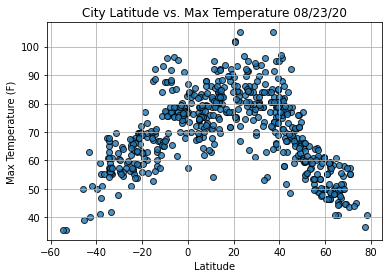

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

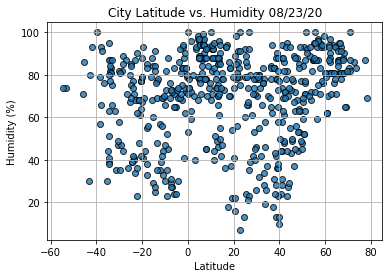

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

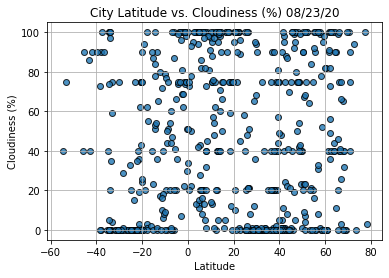

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

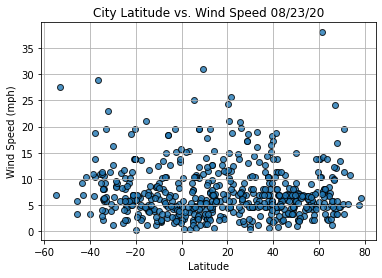

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()